# Themes in Frequent Productions

This notebook shows an overview of the most common themes in frequent productions 1946-1963. The frequent productions used are found in notebook 2_data_exploration. The descriptions of the popular productions were produced using the Tesseract notebook.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict

df = pd.read_csv('cleaned_dataset.csv', encoding='utf-8', index_col=False)
# Removing redundant columns
df = df.drop(columns=['Unnamed: 0'])
df.sample(10)

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Image,Collection,Production,Date,Occasion,Leaflet Language,Multiple Bill,Performance_ID,Normalized Title,Original Language,Composer,Original Premiere,Original Title,Genre,Title Language,Season,Directors
1873,Scan 2024-03-11 1158-120.jpeg,1953-1954,Boccaccio,1954-02-20,NaN,ned,False,752654,Boccaccio,FR,Franz von Suppé,1879,Boccaccio,komische opera,unk,1953-1954,August Baeyens
2290,Scan 2024-03-18 1144-101.jpeg,1955-1956,De Barbier van Sevilla,1955-10-29,NaN,ned,False,121680,De Barbier van Sevilla,ITA,Giovanni Paisiello,1782,Il barbiere di Siviglia,opera buffa,NL,1955-1956,August Baeyens
554,Scan 2024-02-16 1040-28.jpeg,1948-1949,Herodias,1948-11-21,NaN,ned,False,853600,Herodias,FR,Jules Massenet,1882,Hérodiade,romantische opera,Unk,1948-1949,Karel Bogaers
335,Scan 2024-02-14 1427-53.jpeg,1947-1948,Italiaans Capriccio,1948-01-11,NaN,ned,True,757702,Italiaans Capriccio,ITA,Peter Tsjaikovsky,1880,Capriccio italien,?,NL,1947-1948,August Baeyens
2564,Scan 2024-03-18 1335-220.jpeg,1956-1957,Een Kleine Nachtmuziek,1956-12-16,NaN,ned,True,955987,Een Kleine Nachtmuziek,DUI,Wolfgang Amadeus Mozart,1787,Eine kleine Nachtmusik,ballet,NL,1956-1957,August Baeyens
2782,Scan 2024-03-18 1529-167.jpeg,1957-1958,Victoria en haar Huzaar,1957-11-23,NaN,ned,False,718292,Victoria en haar Huzaar,DUI,Paul Abraham,1933,Viktoria und ihr Husar,operette,NL,1957-1958,August Baeyens
2172,Scan 2024-03-11 1549-187.jpeg,1954-1955,Carmen,1955-03-27,NaN,ned,False,429336,Carmen,FR,Georges Bizet,1875,Carmen,opéra comique,Unk,1954-1955,August Baeyens
3379,Scan 2024-03-25 1354-285.jpeg,1959-1960,Pygmalioon,1960-06-07,NaN,ned,False,833696,Pygmalioon,NL,Johannes den Hertog,1957,Pygmalioon,opera,NL,1959-1960,Mina Bolotine
2526,Scan 2024-03-18 1335-116.jpeg,1956-1957,Don Carlos,1956-11-03,NaN,ned,False,170610,Don Carlos,ITA,Giuseppe Verdi,1867,Don Carlos,romantische opera,Unk,1956-1957,August Baeyens
2731,Scan 2024-03-18 1432-178.jpeg,1956-1957,De Vlek,1957-06-24,NaN,ned,True,942606,De Vlek,NaN,NaN,NaN,NaN,NaN,NaN,1956-1957,August Baeyens


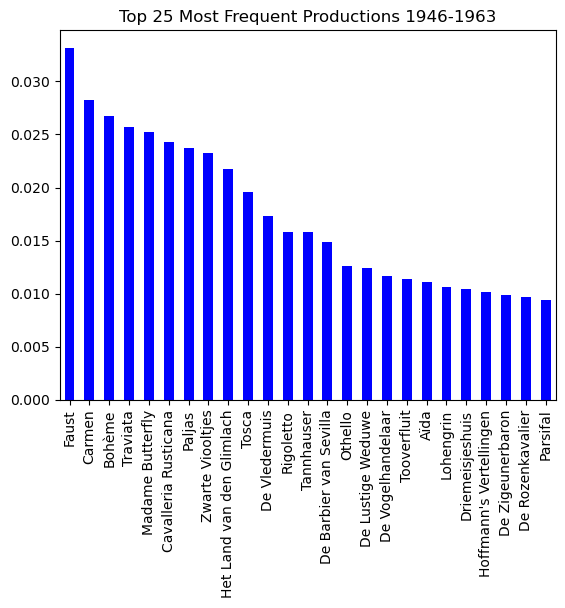

In [2]:
df['Normalized Title'].value_counts(normalize=True).head(25).plot(kind='bar', color = 'blue')
plt.title("Top 25 Most Frequent Productions 1946-1963");

In [3]:
# Loading txt files with production description

import re

folder_path = 'theme' # Folder in which I stored the txt files

opera_texts = defaultdict(str)

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        # Remove trailing digits before the extension (e.g., traviata1.txt → traviata)
        base_name = re.sub(r'\d+\.txt$', '', filename)
        with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as f:
            opera_texts[base_name] += f.read() + ' '

# Convert to dataframe            
df = pd.DataFrame([
    {'opera': name, 'text': text} for name, text in opera_texts.items()
])

In [4]:
# Lowercasing text and simple cleaning

df['clean_text'] = df['text'].str.lower().str.replace(r'[^a-zA-Z\s]', '', regex=True)

df.head()

,opera,text,clean_text
0,rozenkavalier,INHOUDSOPGAVE.\n\nEerste bedrijf. — De slaapka...,inhoudsopgave\n\neerste bedrijf de slaapkamer...
1,traviata.txt,AoOY 3LaIDO i\n‘ FIDO1IOOZ ga JAlv. a - _ 2\ns...,aooy laido i\n fidoiooz ga jalv a \nsuaanvd ...
2,zigeunerbaron,De Zigeunerbaron\n\nINHOUDSOPGAVBE.\n\nEerste ...,de zigeunerbaron\n\ninhoudsopgavbe\n\neerste b...
3,butterfly.txt,Madame BUTTERFLY\n\nINHOUDSOPGAVE\n\nFranklin ...,madame butterfly\n\ninhoudsopgave\n\nfranklin ...
4,barbier.txt,"ater\n\nINHOUDSOPGAVE,\n\nOm de aandacht op zi...",ater\n\ninhoudsopgave\n\nom de aandacht op zic...


In [5]:
# Defining dictionary of themes and keywords

themes = {
    'love': [
        'liefde', 'passie', 'romantiek', 'geliefde', 'affaire', 'verlangen', 'hartstocht', 
        'relatie', 'minnaar', 'verliefd', 'trouw', 'huwelijk', 'jaloezie'
    ],
    'death': [
        'verlies', 'dood', 'overlijden', 'rouw', 'verdriet', 'afscheid', 'zelfmoord', 'moord', 
        'tragedie', 'gemis', 'trauma', 'litteken', 'herinnering', 'nachtmerrie', 'leed', 'smart'
    ],
    'power': [
        'macht', 'autoriteit', 'heerser', 'koning', 'regering', 'dictatuur', 'tirannie', 
        'onderdrukking', 'censuur', 'bezetting', 'regime', 'controle', 'structuur', 'machtsstrijd'
    ],
    'identity': [
        'identiteit', 'verkleed', 'vermomming', 'afkomst', 'dubbelgangers', 'geheim', 
        'masker', 'zelf', 'zoektocht', 'transformatie', 'ontdekking', 'verwarring'
    ],
    'treason': [
        'verraad', 'verrader', 'bedrog', 'list', 'intrige', 'misleiding', 'bedrieger', 
        'ontrouw', 'spionage', 'dubbelspel', 'samenzwering'
    ],
    'war': [
        'oorlog', 'strijd', 'slag', 'gevecht', 'leger', 'soldaat', 'rebellie', 'verzet', 
        'vrijheid', 'opstand', 'strijders', 'strijdtoneel', 'held', 'martelaar'
    ],
    'justice': [
        'gerechtigheid', 'wet', 'recht', 'rechtbank', 'proces', 'straf', 'wraak', 
        'boetedoening', 'veroordeling', 'schuld', 'onrecht', 'vergeving', 'berouw'
    ],
    'madness': [
        'waanzin', 'krankzinnig', 'hallucinatie', 'verwarring', 'gekte', 'obsessie', 
        'mentaal', 'verdwazing', 'paniek', 'desoriëntatie', 'hysterie'
    ],
    'nostalgia': [
        'nostalgie', 'verleden', 'vroeger', 'herinnering', 'verlangen', 'jeugd', 
        'gemis', 'tijd', 'terugblik', 'melancholie'
    ],
    'fate': [
        'lot', 'noodlot', 'bestemming', 'voorzienigheid', 'verlossing', 'vergeving', 
        'toekomst', 'hoop', 'zelfopoffering', 'martelaar', 'opoffering', 'zingeving'
    ]
}

In [6]:
# Count theme words per production

from collections import Counter

def count_theme_words(text, theme_keywords):
    word_list = text.split()
    word_counts = Counter(word_list)
    return sum(word_counts[word] for word in theme_keywords)

for theme, keywords in themes.items():
    df[theme] = df['clean_text'].apply(lambda text: count_theme_words(text, keywords))

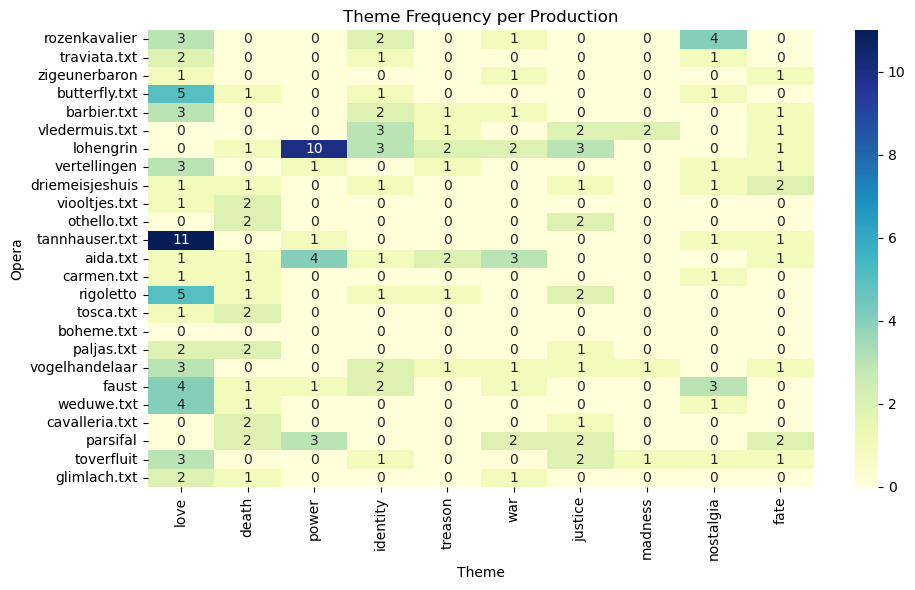

In [7]:
# Visualizing theme frequencies per production

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df[list(themes.keys())], annot=True, cmap='YlGnBu', xticklabels=True, yticklabels=df['opera'])
plt.title('Theme Frequency per Production')
plt.xlabel('Theme')
plt.ylabel('Opera')
plt.tight_layout()
plt.show()

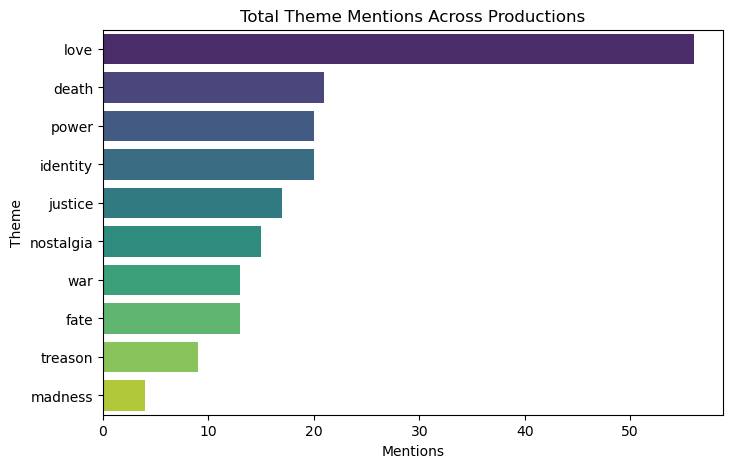

In [8]:
# Bar plot of most common themes overall

theme_totals = df[list(themes.keys())].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=theme_totals.values, y=theme_totals.index, palette='viridis')
plt.title('Total Theme Mentions Across Productions')
plt.xlabel('Mentions')
plt.ylabel('Theme')
plt.show()